# Predicting sed_basin using ML

for NSF Bedclasses


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None

In [2]:
from matplotlib import rc,rcParams

# rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


## Read in sampled line (from Borthwick)

In [3]:
# import sys

# sys.path.append(basedir)

from bedclass.custom_funcs import *
from bedclass.config import *

In [105]:
datadir = 'data'
infile = os.path.join(get_project_root(), datadir, 'interim/upper_thwaites_model_sed_sampled.csv')

df = read_UTG_line(infile)
df.describe()

,index,OBJECTID,freeair_grav,flight_elev,PSX,PSY,sed_basin,classvalue,water,mag,reflectivity,swathradar,roughness,bedmachine,beta,boug,Dist
count,460.000000,460.000000,437.000000,460.000000,4.600000e+02,460.000000,459.000000,460.000000,460.000000,460.000000,62.000000,88.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,229.500000,230.500000,-28.042494,1689.490087,-1.313272e+06,-450648.991500,0.307190,0.306522,0.573535,-40.158680,6.286243,-1284.355308,254.082652,-1288.425006,10.062760,22.906072,108193.835037
std,132.934821,132.934821,6.759569,135.396275,6.526629e+04,12186.996188,0.461832,0.461551,4.010573,142.270751,3.574286,96.630151,404.220910,90.979073,0.371915,6.501455,63889.122885
min,0.000000,1.000000,-46.460000,1437.880000,-1.424985e+06,-476438.670000,0.000000,0.000000,0.000000,-257.676758,-1.026381,-1449.204468,0.996881,-1450.547119,9.437228,5.931017,0.000000
25%,114.750000,115.750000,-31.250000,1609.320000,-1.369708e+06,-460605.387500,0.000000,0.000000,0.000024,-159.182751,4.504384,-1367.720490,43.642040,-1363.822906,9.730996,19.743739,52895.476661
50%,229.500000,230.500000,-27.340000,1704.190000,-1.313834e+06,-447181.570000,0.000000,0.000000,0.003169,-47.540297,6.262333,-1314.172546,122.215015,-1290.764832,10.142768,21.519304,106916.903802
75%,344.250000,345.250000,-23.700000,1774.905000,-1.256990e+06,-439798.090000,1.000000,1.000000,0.015353,57.275605,8.095121,-1202.049561,266.682228,-1236.620636,10.376422,25.486058,163244.016528
max,459.000000,460.000000,-16.800000,1959.560000,-1.200000e+06,-436558.440000,1.000000,1.000000,49.867958,231.882401,16.182016,-1086.331177,3373.853027,-1019.181213,10.857524,40.126896,220454.222587


In [106]:
# df['reflectivity'].fillna(df['reflectivity'].median(), inplace=True)
df['reflectivity'].fillna(df['reflectivity'].min(), inplace=True)

# Scikit-learn

In [121]:
from bedclass.custom_funcs import create_model_inputs

# feature_cols = ['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness'] ## , 'swathradar', 'reflectivity'
feature_cols = ['water', 'mag', 'boug', 'bedmachine', 'roughness', 'reflectivity']
target_col = ['classvalue']
df_scaled = create_model_inputs(df, feature_cols, target_col, scale=True)

## Yellowbrick for visualization

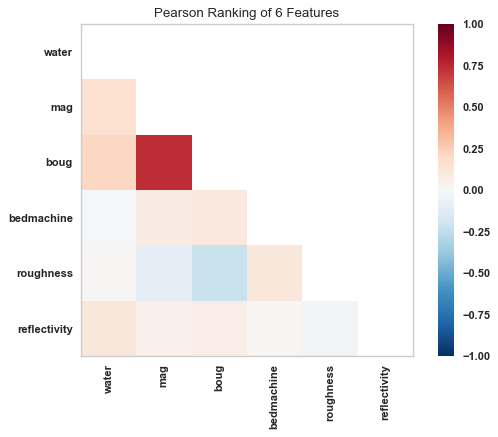

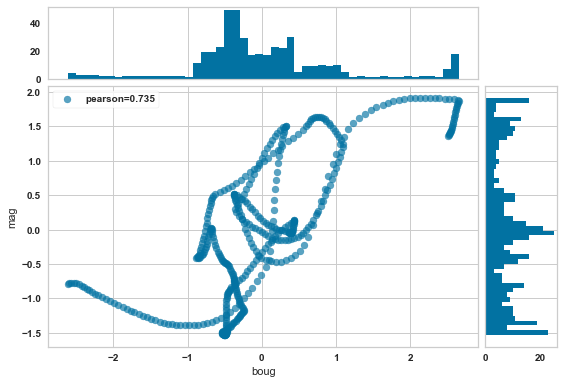

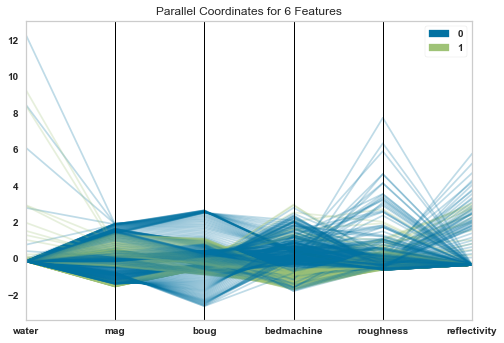

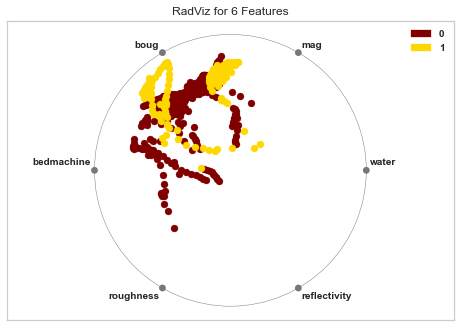

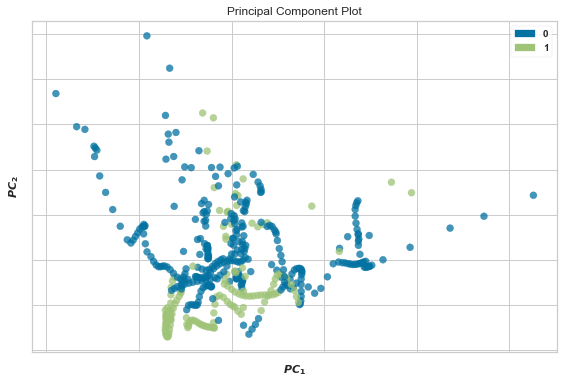

In [122]:
from bedclass.custom_funcs import plot_model_inputs_all

plot_model_inputs_all(df_scaled, feature_cols, target_col)

## GaussianNB

Accuracy of MLPClassifier : 0.7608695652173914

ShuffleSplit cross-validation:
0.78 accuracy with a standard deviation of 0.03


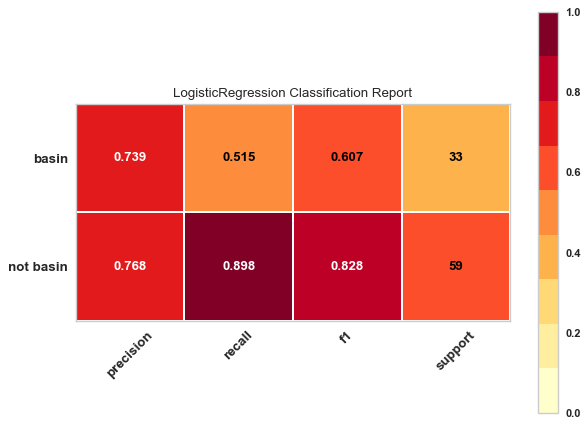

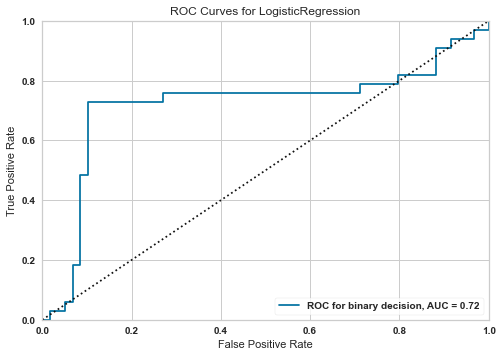

In [123]:
from bedclass.custom_funcs import run_ML_model

ML_model = 'LogisticRegression'  # 'LogisticRegression', 'Perceptron', 'MLP' 

y_hats, classifier, scores = run_ML_model(df_scaled, feature_cols, target_col, 
                    model_type=ML_model,
                    model_score=True, 
                    model_plots=True,
                   )

df['predicted_class'] = y_hats

## Plot Predictions along Survey Line

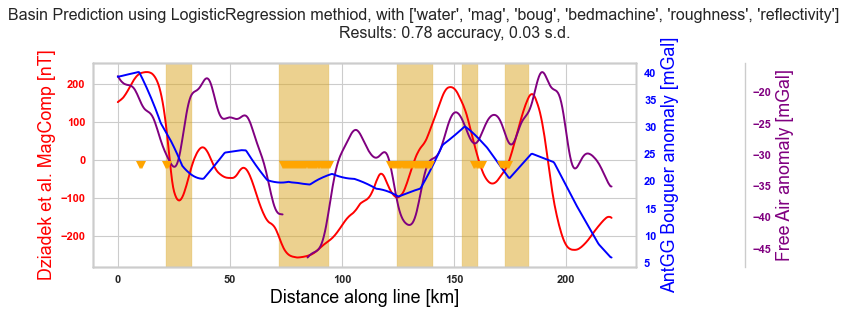

In [147]:
from bedclass.custom_funcs import line_overplot_3

my_vars= ['mag', 'freeair_grav', 'boug']
var_labels = ['Dziadek et al. MagComp [nT]', 
              'Free Air anomaly [mGal]', 
              'AntGG Bouguer anomaly [mGal]']
x_var = 'Dist'
x_label = 'Distance along line [km]'
my_colors = ['red', 'purple', 'blue']

feature_char = ''.join(feature_cols)
my_title = f"Basin Prediction using {ML_model} methiod, with {feature_cols}\n \
             Results: {scores.mean():.2f} accuracy, {scores.std():.2f} s.d."
my_file = f'figs/lineplot_UTG_sample_{ML_model}-{feature_char}_plotPot.png'

line_overplot_3(df, my_vars, var_labels, x_var, x_label, my_colors, my_title, my_file, prediction=True)

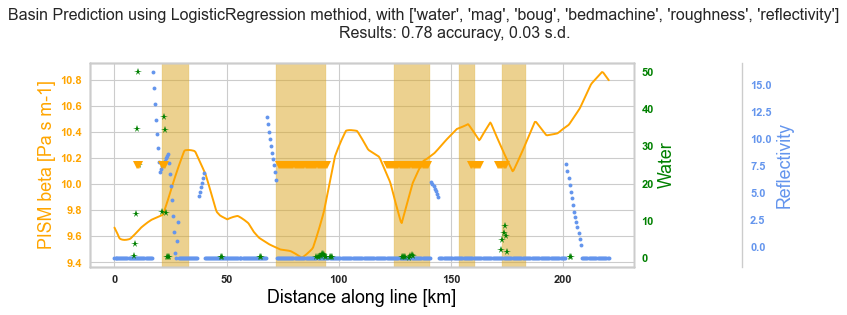

In [145]:
from bedclass.custom_funcs import line_overplot_3

my_vars= ['beta', 'reflectivity', 'water']
var_labels = ['PISM beta [Pa s m-1]', 
              'Reflectivity', 
              'Water']
x_var = 'Dist'
x_label = 'Distance along line [km]'
my_colors = ['orange', 'cornflowerblue', 'green']

feature_char = ''.join(feature_cols)
my_title = f"Basin Prediction using {ML_model} methiod, with {feature_cols}\n \
             Results: {scores.mean():.2f} accuracy, {scores.std():.2f} s.d."
my_file = f'figs/lineplot_UTG_sample_{ML_model}-{feature_char}_plotBeta.png'

df_plot = df.copy()
df_plot['water'].where(df_plot['water'] >= 0.1, np.nan, inplace=True)
line_overplot_3(df_plot, my_vars, var_labels, x_var, x_label, my_colors, my_title, my_file, use_markers=True, prediction=True)

# Predict `sed_basin` for all of ASE



In [126]:
from bedclass.custom_funcs import predict_csv

infile = os.path.join(get_project_root(), 'data', 'interim/Sample_ASE_antgg3.csv')

df_ASE_pred = predict_csv(classifier, infile, feature_cols, model_plots_maps=False)            

### plot ML model for ASE with overlain UTG line

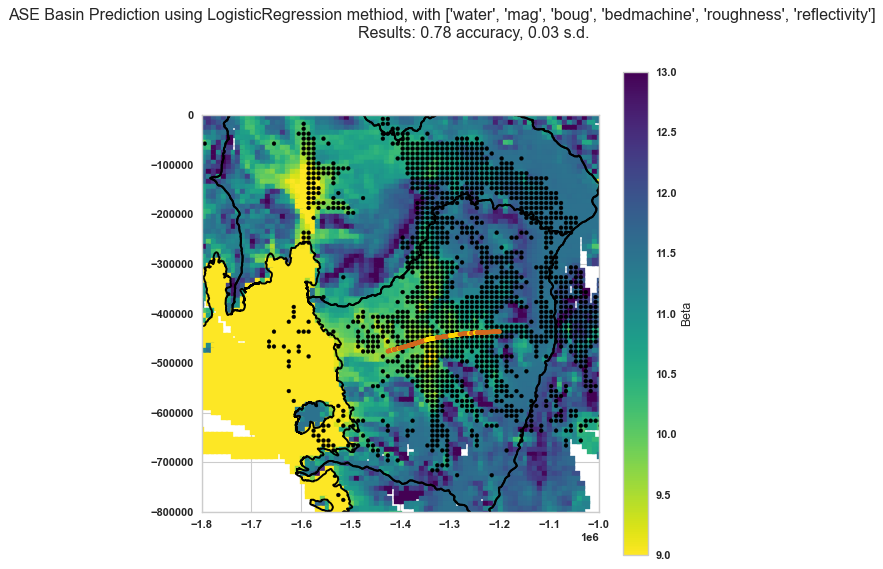

In [127]:
var_plot = 'beta'

if var_plot == 'beta':
    my_label = 'Beta'
    my_vmin = 9
    my_vmax = 13
    my_cmap = 'viridis_r'
elif var_plot == 'boug':
    my_label = 'Bouguer Anamoly [mGal]'
    my_vmin = -60
    my_vmax = 80
    my_cmap = 'Spectral'
elif var_plot == 'bedmachine':
    my_label = 'Bedmachine [masl]'
    my_vmin = -1500
    my_vmax = 1000
    my_cmap = 'terrain'
elif var_plot == 'roughness':
    my_label = 'Roughness'
    my_vmin = 0
    my_vmax = 2000
    my_cmap = 'magma'
else:
    my_label = var_plot
    my_vmin = df_ASE_pred[var_plot].min()
    my_vmax = df_ASE_pred[var_plot].max()
    my_cmap = 'viridis'
    
shapefile = read_shapefile(os.path.join(get_project_root(), 'data/external/ASE_catchments+GL_3031.shp'))
 

fig, ax = plt.subplots(figsize=(8, 8), dpi=80) 
ax.set_aspect('equal')

shapefile.boundary.plot(ax=ax, edgecolor='black')

plt.scatter(df_ASE_pred['X'], df_ASE_pred['Y'], c=df_ASE_pred[var_plot], 
            vmin=my_vmin, vmax=my_vmax,
            marker=',',
            cmap=my_cmap)
plt.colorbar(label=my_label)

color_null = '#FF000000'  # 'chocolate'  'grey', '#FF000000'
color_basin = 'black'   #, 'gold' , 'black'
colors= [color_null if l == 0 else color_basin for l in df_ASE_pred['predicted_class']]
plt.scatter(df_ASE_pred['X'], df_ASE_pred['Y'], c=colors, #df_ASE_pred['predicted_class'], 
            marker='.',
#             alpha=0.5,
#             cmap=cmap, 
            edgecolors=None)

color_null = 'chocolate'  # 'chocolate'  'grey'
color_basin = 'gold'   #, 'gold' , 'black'
colors= [color_null if l == 0 else color_basin for l in df['predicted_class']]
plt.scatter(df.PSX, df.PSY, c=colors,
            marker='.', edgecolors=None)

plt.xlim(-1.8e6, -1e6)
plt.ylim(-0.8e6, -0e6)

plt.suptitle(f"ASE Basin Prediction using {ML_model} methiod, with {feature_cols}\n \
             Results: {scores.mean():.2f} accuracy, {scores.std():.2f} s.d.")

fileout = f'figs/mapplot_ASE_ypred_{feature_char}_{var_plot}_UTGline.png'
plt.savefig(fileout)

### Add predictions to dataframe and write to CSV



In [128]:
feature_char = ''.join(feature_cols)
predict_file = os.path.join(get_project_root(), datadir, 
                            f'processed/predict_sed_basin_ASE_{ML_model}-{feature_char}.csv')
df_ASE_pred.to_csv(predict_file)